# 1D Travelling Signal (sine with linear dispersion)


$$
u(x, t) = \sin\left( \frac{2 \pi x}{\lambda} -2\pi f t\right)
\\
= \sin\left( 2 \pi f \, ( \frac{x}{v(f)} -t) \right)
$$

$\lambda = \dfrac{v}{f}$

In [1]:
import numpy as np
import scipy.fft as ft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
class TravellingSine:
    """
    Scalar Travelling Sine wave with a constant dispersion relation per frequency
    """
    def __init__(self, x_0, t_0, frequencies):
        self.x_0 = x_0
        self.t_0 = t_0
        self.freqs = np.array(frequencies).reshape(-1)

    def __call__(self, x_f, t_f, phase_velocities = None):
        x_f = np.array(x_f)
        t_f = np.array(t_f)
        return self._signal(self.x_0, x_f, self.t_0, t_f, self.freqs, phase_velocities)

    def _signal(self, x_0, x_f, t_0, t_f, freqs, phase_velocities = None, debug = 0):

        # broadcasting between x_f and t_f
        if np.ndim(x_f) != 0 or np.ndim(t_f) != 0:
            if np.ndim(x_f) == 0:
                x_f = x_f * np.ones(t_f.shape)
            if np.ndim(t_f) == 0:
                t_f = t_f * np.ones(x_f.shape)
        
        assert len(x_f) == len(t_f), "x_f and t_f MUST have equal length: {} and {}".format(len(x_f), len(t_f))
        
        # broadcasting between frequencies and phase velocities
        if phase_velocities is None:
            phase_velocities = 1
        
        if callable(phase_velocities):
            phase_velocities = phase_velocities(freqs)

        if np.ndim(phase_velocities) == 0:
            phase_velocities = phase_velocities * np.ones(self.freqs.shape)
        
        assert len(freqs) == len(phase_velocities), "freqs and phase_velocities MUST have equal length: {} and {}".format(len(freqs), len(phase_velocities))
        
        # get the wavelengths for each frequency
        wavelengths = phase_velocities / freqs
        
        # make sure these are 1d arrays
        time_diff  = np.array(t_0 - t_f).reshape(-1)        
        space_diff = np.array(x_0 - x_f).reshape(-1)       
    
        # ndarray of phase components
        time_phase  = np.outer(2*np.pi*freqs, time_diff)
        space_phase = np.outer(2*np.pi/wavelengths, space_diff)
        
        if debug:
            if debug > 1:
                #print('time_diff', time_diff)
                print('frequencies', freqs)
                #print('time_phase', time_phase)

                #print('space_diff', space_diff)
                print('wavelengths', wavelengths)
                #print('space_phase', space_phase)
            
            print('time_phase shape', time_phase.shape)
            print('space_phase shape', space_phase.shape)
    
        signal = np.sin( time_phase + space_phase )

        if freqs.shape:
            signal = signal.sum(axis=0)
 
        return signal


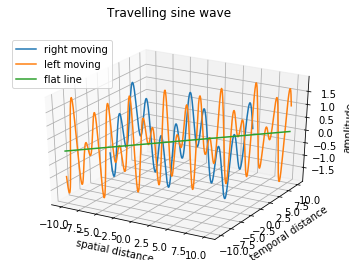

In [3]:
frequencies = 1/np.array([2,-2])
velocities = np.array([1, 4])
signal  = TravellingSine(0, 0, frequencies)

zeros = np.zeros(500)
x = np.linspace(-10, 10, 500)
t = x

x_mesh, t_mesh = np.meshgrid(x,t, sparse=True)

fig = plt.figure()
plt.suptitle("Travelling sine wave")
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, zeros, signal(x, zeros, velocities), label='right moving')
ax.plot(x, t, signal(x, t, velocities), label='left moving')
ax.plot(x, t, signal(x, t, 1), label='flat line')
ax.set_xlabel("spatial distance")
ax.set_ylabel('temporal distance')
ax.set_zlabel("amplitude")
ax.legend()
plt.show();

In [ ]:
# animation
fig = plt.figure()
plt.suptitle("Travelling sine wave")
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("spatial distance")
ax.set_ylabel('temporal distance')
ax.set_zlabel("amplitude")
l1 = ax.plot(x[0], t[0], signal(x[0], t[0], velocities), label='right moving')
l2 = ax.plot(x[0], t[0], signal(x[0], t[0], velocities[::-1]), label='left moving')
l3 = ax.plot(x[0], t[0], signal(x[0], t[0], 1), label='flat line')

lines = [l1, l2, l3]

def update(i, fig, ax):
    ax.view_init(elev=20., azim=i)
    
    
    ax.legend()
    return fig, ax
 
anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), repeat=True, fargs=(fig, ax))
anim.save('rgb_cube.gif', dpi=80, writer='imagemagick', fps=24)
plt.show();